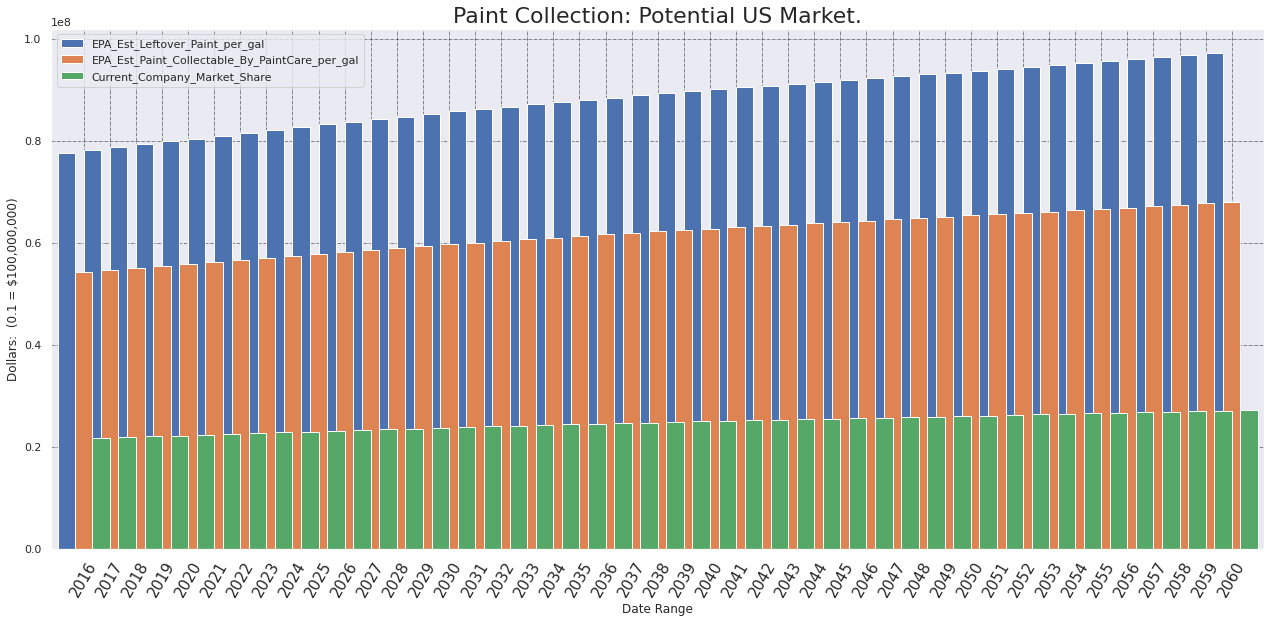

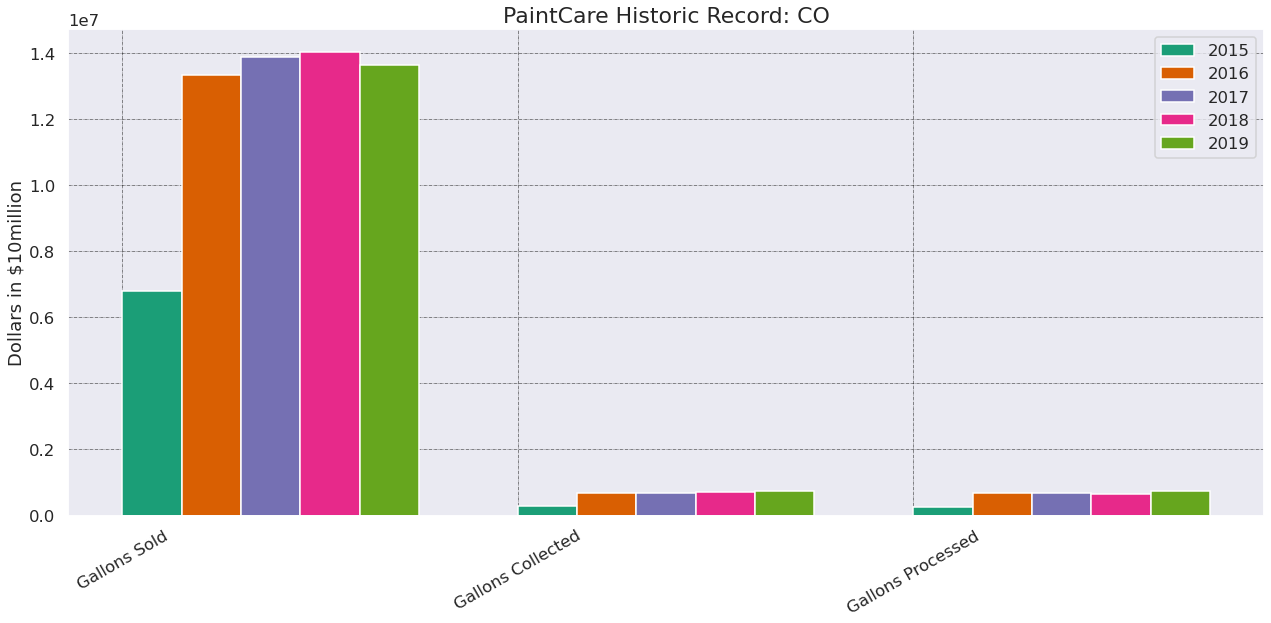

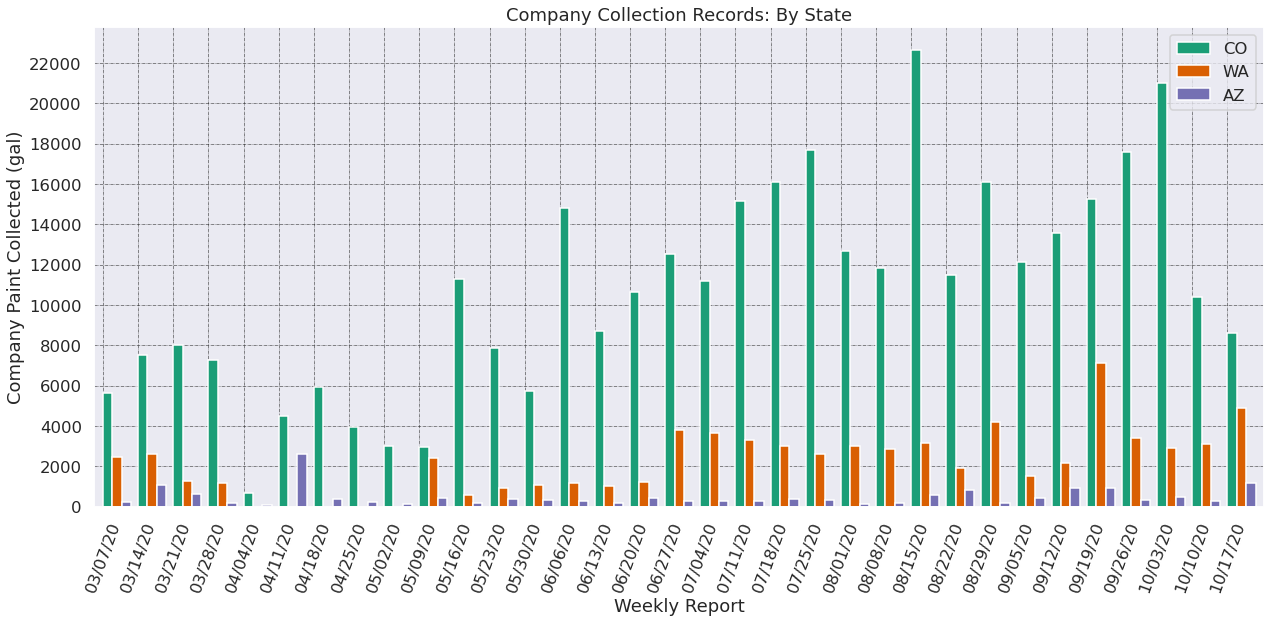

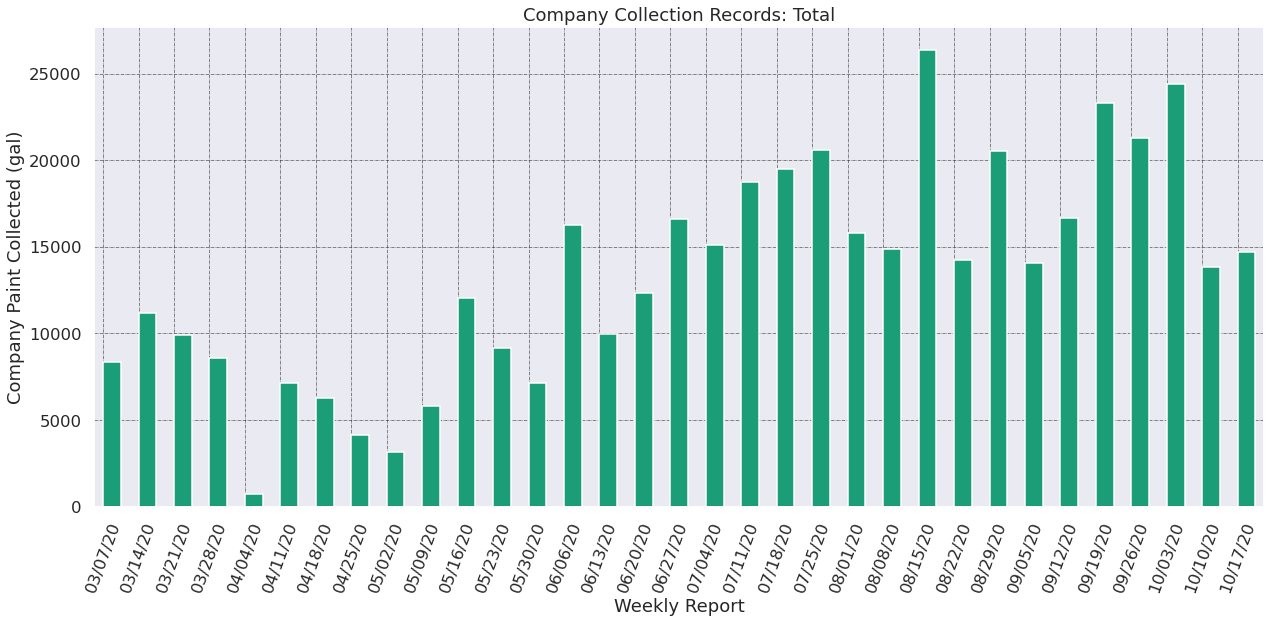

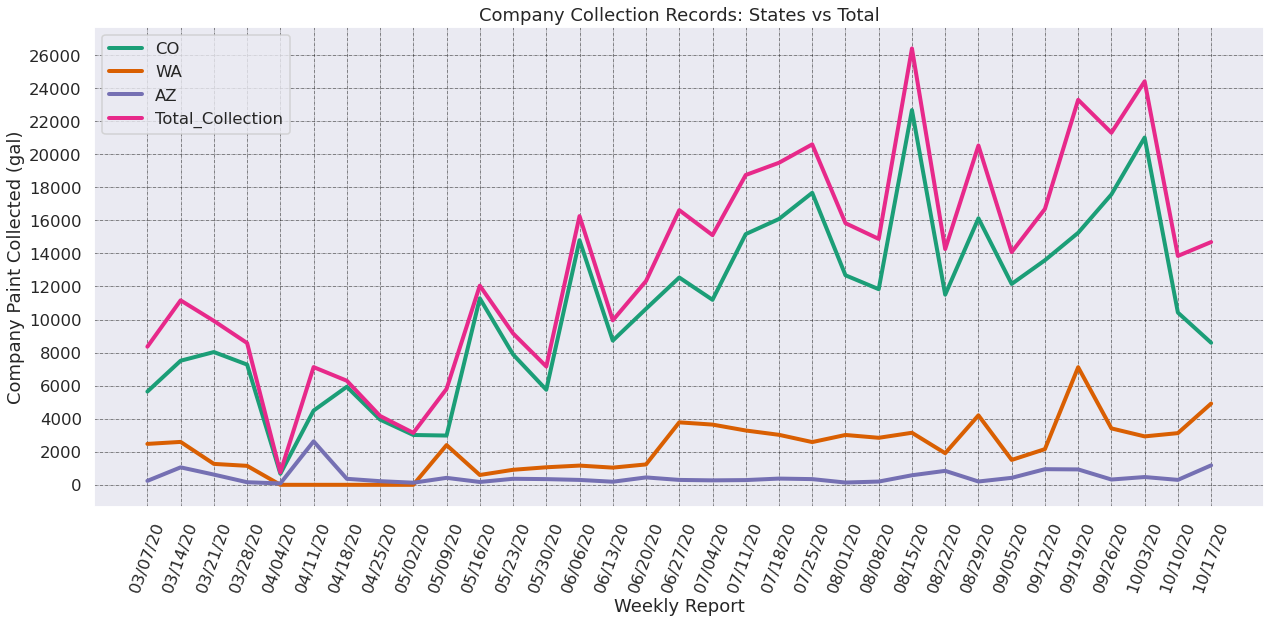

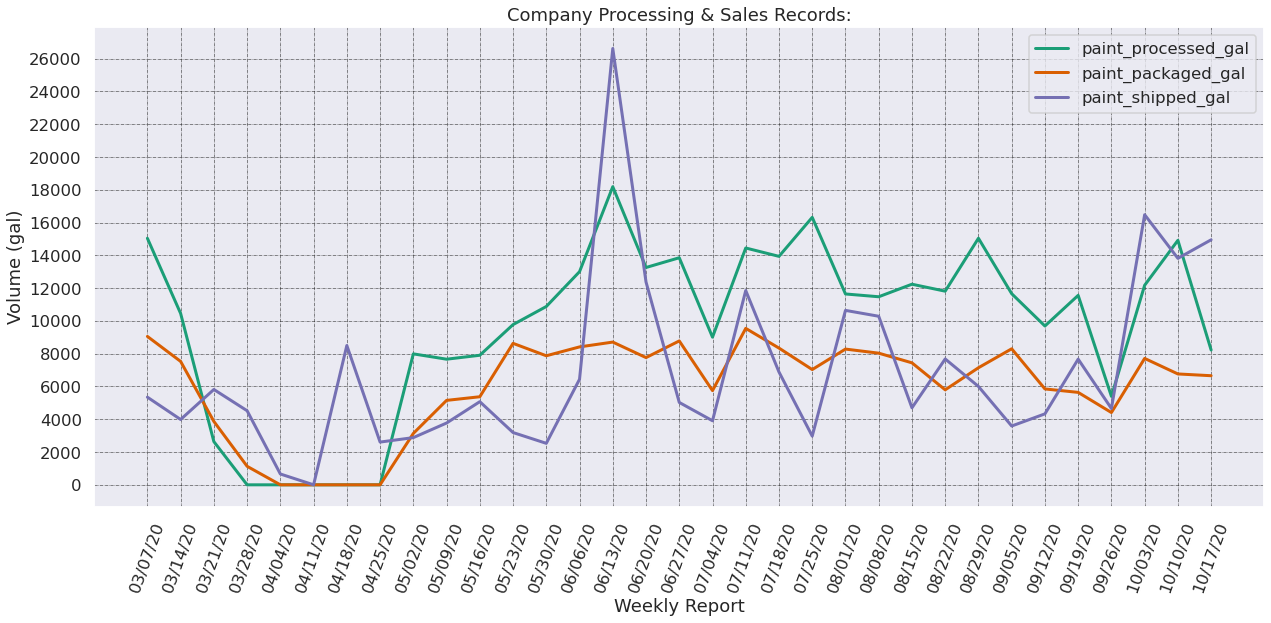

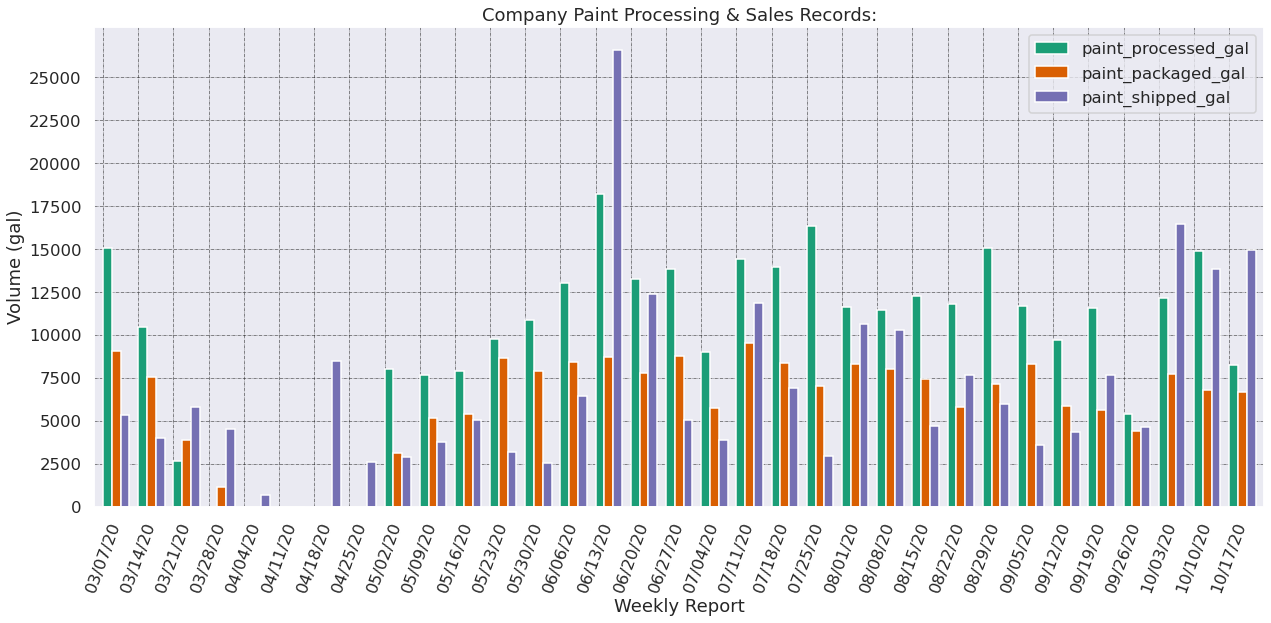

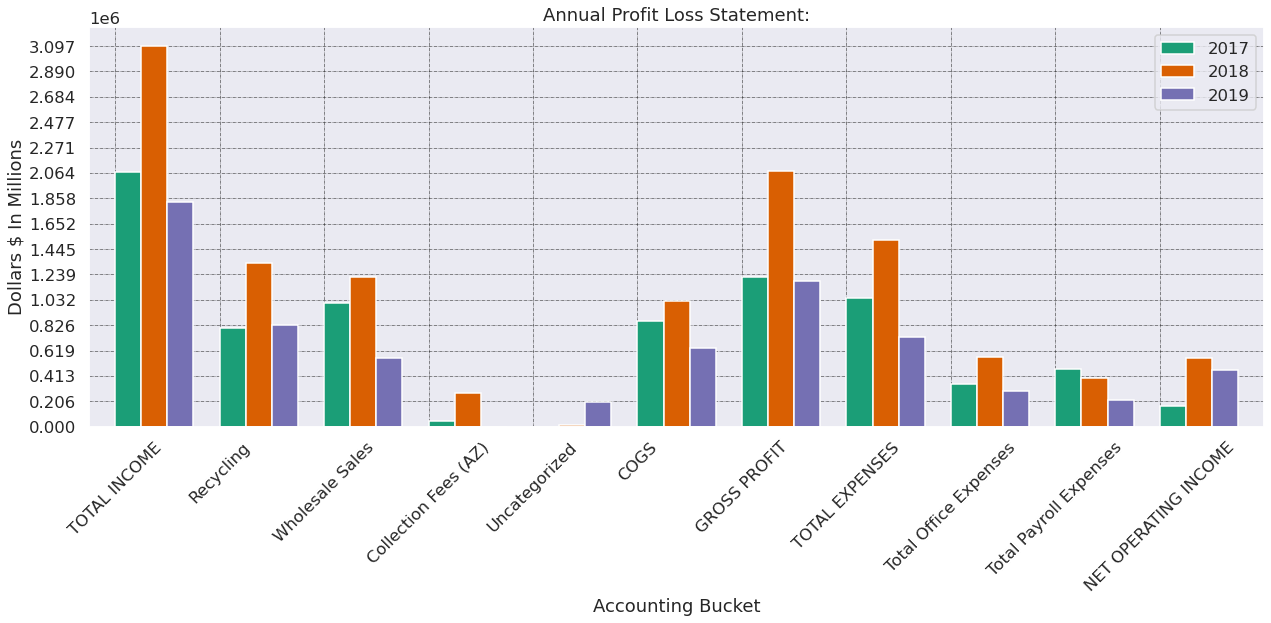

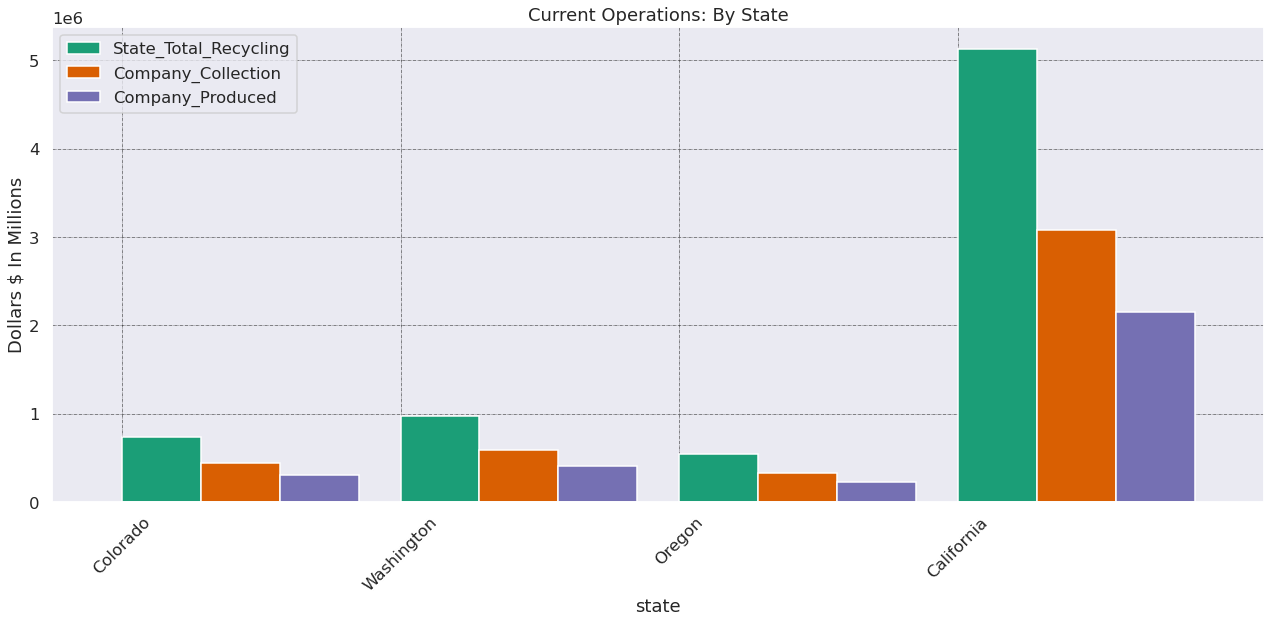

                      state    2018_pop
Rank                                   
0                California  39557045.0
1                  New York  19542209.0
2                Washington   7535591.0
3                  Colorado   5695564.0
4                    Oregon   4190713.0
5               Connecticut   3572665.0
6                     Maine   1338404.0
7              Rhode Island   1057315.0
8      District of Columbia    702455.0
9                   Vermont    626299.0
10                  Wyoming    577737.0
                                category  reported  structured
0                    Total Cost / Gallon     -6.22       -6.22
1                         Intake Revenue      2.46        3.80
2            Cost include Intake Revenue     -3.76       -2.42
3  Cost including intake & OH (variable)     -4.40       -3.06


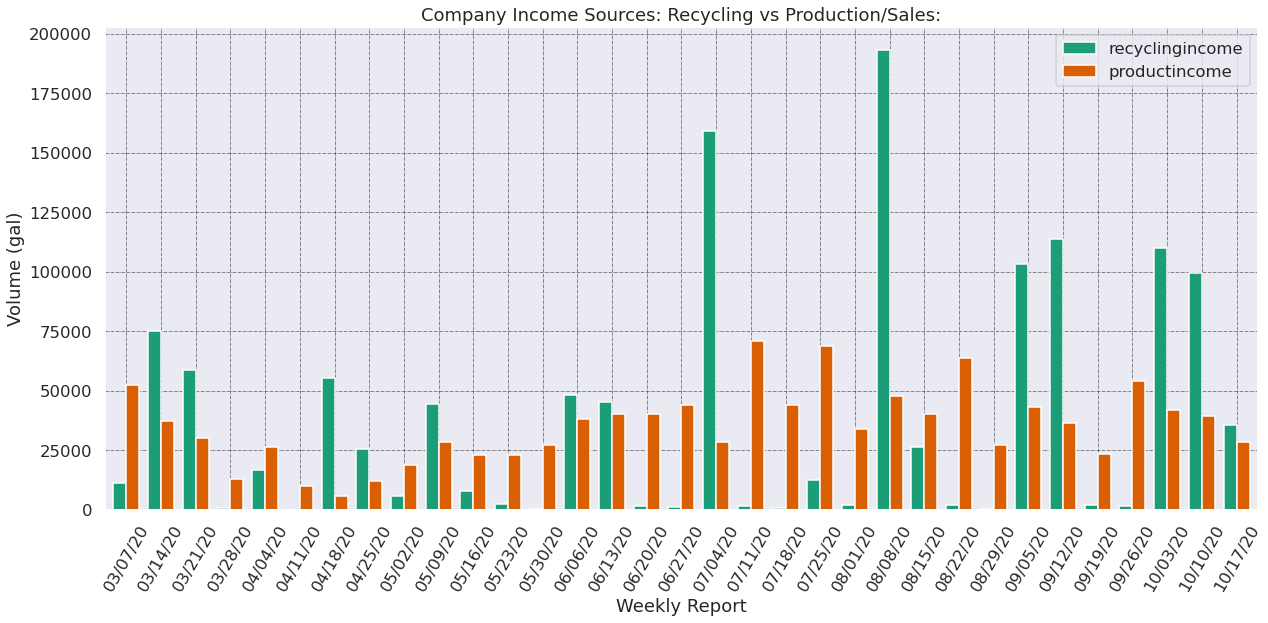

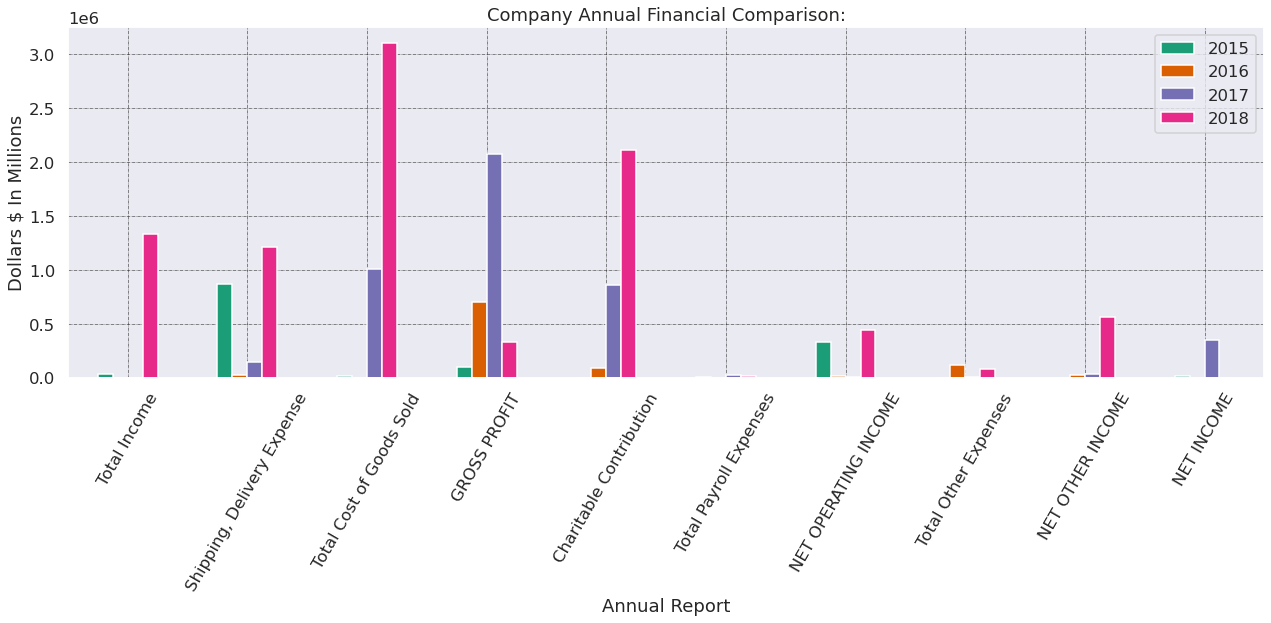

In [3]:
### ### ### ###    ### ### ### ### ### ###   Python Library Imports:

import pandas as pd
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
matplotlib.rcParams.update({'font.size' : 16, 'font.family' : 'sans'})
import scipy as sp
import scipy.stats as stats
import seaborn as sns
sns.set()
from datetime import date, datetime, timedelta
from IPython.display import IFrame
import warnings
warnings.filterwarnings('ignore')


### ### ### ### ### ###     Import datafiles via csv files & pandas:
    
    
def imports():
    data_df_lst = []
    csv_lst = [
        'census', 'paintcare_co', 'paint_collected','paint_processed','profit_loss','proforma',
        'states', 'total_cost', 'weekly_kpi', 'gs_pl_2015', 'gs_pl_2016', 'gs_pl_2017', 'gs_pl_2018'
    ]
    for r in range(len(csv_lst)):
        data_df_lst.append(pd.read_csv('/home/gordon/galvanize/capstones/capstone1/data/'+str(csv_lst[r])+'.csv'))
    return data_df_lst
        
def clean():
    clean_lst = imports()
    for clean in clean_lst:
        
        columns = clean.columns
        cols = [column.replace(' ', '_') for column in columns]
        cols = [col.replace('.','') for col in cols]
        cols = [col.replace('(','') for col in cols]
        cols = [col.replace(')','') for col in cols]
        cols = [col.replace(':','') for col in cols]
        clean.columns = [col.lower() for col in cols]
    
    for clean in clean_lst:
        clean.fillna(0, inplace = True)
    return clean_lst

data = clean()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def census():
    census = data[0][['year','total_pop']]
    census['total_pop'] = census['total_pop'].astype(float)
    census['EPA_Annual_Est_Paint_Sold_per_gal'] = census['total_pop'] * 2.4
    census['EPA_Est_Leftover_Paint_per_gal'] = census['EPA_Annual_Est_Paint_Sold_per_gal'] * 0.10
    census['EPA_Est_Paint_Collectable_By_PaintCare_per_gal'] = census['EPA_Est_Leftover_Paint_per_gal'] * 0.70
    census['Current_Company_Market_Share'] = census['EPA_Est_Paint_Collectable_By_PaintCare_per_gal'] * 0.4
    
    x = np.arange(len(census['EPA_Est_Leftover_Paint_per_gal']))
    y = np.arange((census['EPA_Est_Leftover_Paint_per_gal'].max()), 500000)   
    fig = plt.figure(figsize=(18, 9))
    ax = fig.add_subplot(111, ylabel='Dollars:  (0.1 = $100,000,000)', xlabel = 'Date Range') 
    census[['EPA_Est_Leftover_Paint_per_gal', 'EPA_Est_Paint_Collectable_By_PaintCare_per_gal', 'Current_Company_Market_Share']].plot(kind = 'bar', ax=ax, width = 2)
    ax.set_xticks(x)
    ax.set_xticklabels(census['year'], rotation = 60, fontsize = 15)
    ax.set_yticks(y , [['EPA_Est_Leftover_Paint_per_gal', 'EPA_Est_Paint_Collectable_By_PaintCare_per_gal', 'Current_Company_Market_Share']])
    ax.set_title('Paint Collection: Potential US Market.', fontsize = 22)
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()    
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/census_bar_potential_mkt.png')
    plt.show()
census()


 ### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def paintcare():
    
    paintcare_co = data[1]
    
    fig = plt.figure(figsize=(18, 9))
    ax = fig.add_subplot(111, ylabel = 'Dollars in $10million') 
    paintcare_co[['2015', '2016', '2017', '2018', '2019']].plot(kind = 'bar',ax=ax, width = .75, align = 'edge')
    ax.set_xticklabels(paintcare_co['co_record'], rotation = 30)
    ax.set_title('PaintCare Historic Record: CO', fontsize = 22)
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    ax.axis('tight')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/cpaintcare_co_records.png')
    plt.show();
paintcare()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def paintCollected():
    
    paint_collected = data[2]
    date = list(paint_collected.columns[1:])
    paint_collected = paint_collected.set_index('paint_collected_gallons').transpose()
    columns = paint_collected.columns
    cols = [column.replace(' ', '_') for column in columns]
    paint_collected.columns = [col.lower() for col in cols]
    paint_collected['date'] = date
    paint_collected.head()

    paint_collected.columns = ['CO', 'WA','AZ','Total_Collection', 'Date']
    x = np.arange(len(paint_collected['CO']))
    y = np.arange(0, int(paint_collected['CO'].max()) + 250, 2000)
    fig = plt.figure(figsize=(18, 9))
    ax = fig.add_subplot(111, ylabel = 'Company Paint Collected (gal)', xlabel = 'Weekly Report') 
    paint_collected[['CO','WA', 'AZ']].plot(kind = 'bar', ax = ax, width = .8, align = 'edge')
    ax.set_xticks(x)
    ax.set_xticklabels(paint_collected['Date'], rotation = 70)
    ax.set_yticks(y)
    ax.set_title('Company Collection Records: By State')
    plt.grid(color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/paint_collected_bar_states.png')
    plt.show()


    x1 = np.arange(len(paint_collected['Total_Collection']))
    y1 = np.arange(int(paint_collected['Total_Collection'].min()) - 500, int(paint_collected['Total_Collection'].max()) + 500, 1000)
    fig = plt.figure(figsize=(18, 9))
    ax1 = fig.add_subplot(111, ylabel = 'Company Paint Collected (gal)', xlabel = 'Weekly Report') 
    paint_collected['Total_Collection'].plot(kind = 'bar', ax = ax1, width = 0.5, align = 'edge')
    ax1.set_xticklabels(paint_collected['Date'], rotation = 70)
    ax1.set_title('Company Collection Records: Total')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/paint_collected_bar_total.png')
    plt.show()


    x2 = np.arange(len(paint_collected['Total_Collection']))
    y2 = np.arange(0, int(paint_collected['Total_Collection'].max()) + 250, 2000)
    fig = plt.figure(figsize=(18, 9))
    ax2 = fig.add_subplot(111, ylabel = 'Company Paint Collected (gal)', xlabel = 'Weekly Report') 
    paint_collected[['CO', 'WA', 'AZ', 'Total_Collection']].plot(ax = ax2, linewidth=4.0)
    ax2.set_xticks(x2)
    ax2.set_xticklabels(paint_collected['Date'], rotation = 70)
    ax2.set_yticks(y2)
    ax2.set_title('Company Collection Records: States vs Total')
    plt.grid(True, which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/paint_collected_line_statesANDtotal.png')
    plt.show();
paintCollected()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def paintProcessed():
    
    paint_processed = data[3]
    date = list(paint_processed.columns[1:])
    paint_processed = paint_processed.set_index('total_paint_processing').transpose()
    paint_processed.columns = ['paint processed gal','paint packaged gal', 'paint shipped gal']
    columns = paint_processed.columns
    cols = [column.replace(' ', '_') for column in columns]
    paint_processed.columns = [col.lower() for col in cols]
    paint_processed['date'] = date
    paint_processed.head()


    x = np.arange(len(paint_processed['paint_shipped_gal']))
    y = np.arange(0, int(paint_processed['paint_shipped_gal'].max()) + 250, 2000)
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111, ylabel = 'Volume (gal)',xlabel = 'Weekly Report') 
    paint_processed[['paint_processed_gal','paint_packaged_gal', 'paint_shipped_gal']].plot(ax = ax, linewidth=3.0)
    ax.set_xticks(x)
    ax.set_xticklabels(paint_processed['date'], rotation = 70)
    ax.set_yticks(y)
    ax.set_title('Company Processing & Sales Records:')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/paintProcessed_line_processed_packaged_shipped.png')
    plt.show()


    x = np.arange(len(paint_processed['paint_shipped_gal']))
    y = np.arange(0, int(paint_processed['paint_shipped_gal'].max()) + 250, 2500)
    fig = plt.figure(figsize=(18,9))
    ax1 = fig.add_subplot(111, ylabel = 'Volume (gal)',xlabel = 'Weekly Report') 
    paint_processed[[
        'paint_processed_gal', 'paint_packaged_gal','paint_shipped_gal']].plot(kind = 'bar',width = .75, align = 'edge', ax = ax1)
    ax1.set_xticks(x)
    ax1.set_xticklabels(paint_processed['date'], rotation = 70)
    ax1.set_yticks(y)
    ax1.set_title('Company Paint Processing & Sales Records:')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/paintProcessed_bar_processed_packaged_shipped.png')
    plt.show();
paintProcessed()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def profitLoss():
    
    profit_loss = data[4]

    x = np.arange(len(profit_loss['2018']))
    step = int((int(profit_loss['2017'].max()) - int(profit_loss['2018'].min())) / 10)
    y = np.arange(0, int(profit_loss['2018'].max()), step)
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111, ylabel='Dollars $ In Millions', xlabel = 'Accounting Bucket') 
    profit_loss[['2017', '2018', '2019']].plot(kind='bar', ax = ax, width = .75, align = 'edge')

    ax.set_xticks(x)
    ax.set_xticklabels(profit_loss['category'], rotation = 45)
    ax.set_yticks(y)
    ax.set_title('Annual Profit Loss Statement:')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/profitLoss_bar_historical_cashFlow.png')
    plt.show();
profitLoss()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def proform():

    proforma = data[5].drop([2, 5, 6, 7, 8])
    
    proforma.columns = ['state', 'population', 'total_sold', 'State_Total_Recycling', 'Company_Collection', 'Company_Produced']
    proforma = proforma.set_index('state').transpose()
    location = proforma.columns
    proforma = proforma.transpose()
    proforma['location'] = location
    
    x = np.arange(len(proforma['total_sold']))
    y = np.arange(0, 5250000, (5250000 / 10))
    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111, ylabel='Dollars $ In Millions', xlabel = 'Current Operations') 
    proforma[['State_Total_Recycling', 'Company_Collection', 'Company_Produced']].plot(kind = 'bar', ax = ax, width = .85, align = 'edge')
    ax.set_xticklabels(proforma['location'], rotation = 45)
    ax.set_title('Current Operations: By State')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/proforma_bar_recycle_collect_produce_ByState.png')
    plt.show();
proform()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def states():
    
    state = data[6]
    state.at[51, 'state'] = 'Total'
    state.at[50, 'rank_1-50'] = 51
    state = state.drop(['2010_pop', '%_to_total', 'potential_gals_paint', 'potential_rev_@_$15_gal', 'gross_profit_est_65%', 'rank_1-50'], axis = 1)
    state = state.sort_values(by = '2018_pop', ascending = False)
    state['rank'] = np.arange(0, 52)
    state['2018_pop'] = state['2018_pop'].astype(float)
    state.set_index('rank', inplace = True)
    s = state.drop([
        0, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 43, 45, 46, 47, 48
    ])
    s['Rank'] = np.arange(len(s['state']))
    s.set_index('Rank', inplace = True)
    print(s)
states()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def totalCost():
    total_cost = data[7]
    total_cost.set_index('category').transpose()
    print(total_cost)
totalCost()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def weeklyKPI():

    weekly_kpi = data[8]
    date = list(weekly_kpi.columns[1:])
    weekly_kpi = weekly_kpi.set_index('sales').transpose()
    weekly_kpi['date'] = date
    columns = weekly_kpi.columns
    cols = [column.replace('_____', '') for column in columns]
    cols = [column.replace(' ', '') for column in columns]
    weekly_kpi.columns = [col.lower() for col in cols]


    fig = plt.figure(figsize=(18,9))
    ax = fig.add_subplot(111, ylabel = 'Volume (gal)',xlabel = 'Weekly Report') 
    weekly_kpi[['recyclingincome','productincome']].plot(kind = 'bar', ax = ax, width = .75, align = 'center')
    ax.set_xticklabels(weekly_kpi['date'], rotation = 60)
    ax.set_title('Company Income Sources: Recycling vs Production/Sales:')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/weeklyKPI_bar_income_recycle_vs_processed.png')
    plt.show();
weeklyKPI()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ### 


def historic():

    pl_2015, pl_2016, pl_2017, pl_2018 = data[9], data[10], data[11], data[12]
    lst_of_lst_0 = [pl_2015, pl_2016, pl_2017, pl_2018]
    pl2015, pl2016, pl2017, pl2018 = (pl_2015[pl_2015.columns[0]]), (pl_2016[pl_2016.columns[0]]), (pl_2017[pl_2017.columns[0]]), (pl_2018[pl_2018.columns[0]])
    lst_of_lst = [pl2015, pl2016, pl2017, pl2018]

    one = set(pl2015) & set(pl2016)
    two = set(pl2017) & set(pl2018)
    three = two & one

    for idx, num in enumerate(lst_of_lst):
        for i, n in enumerate(num):
            if n not in three:
                lst_of_lst_0[idx] = lst_of_lst_0[idx].drop(i)
                
    pl_2015, pl_2016, pl_2017, pl_2018 = lst_of_lst_0[0], lst_of_lst_0[1], lst_of_lst_0[2], lst_of_lst_0[3]

    df = pd.DataFrame()
    category = list(pl_2015['january_-_december_2015'])
    df['category'] = category
    df['2015'] = pl_2015['total']
    df['2016'] = pl_2016['total']
    df['2017'] = pl_2017['total']
    df['2018'] = pl_2018['total']
    df.fillna(0.0, inplace = True)
    df = df.drop([0,1,2,3,4,8,15, 35, 38, 42, 36,17,18,22,23,27,28,29,31,32,33,34,37,39,6,14,16,20,21,24,26,41,43,47,48,7,12,13,25,30,44,46])

    x = np.arange(len(df['2015']))
    y = np.arange(0, 3000000 , 100000)
    fig = plt.figure(figsize=(18,9))
    labels = df.columns[1:]
    ax = fig.add_subplot(111, ylabel = 'Dollars $ In Millions', xlabel = 'Annual Report') 
    df[['2015','2016', '2017','2018']].plot(kind = 'bar', ax = ax, width = .5, align = 'center')
    ax.set_xticklabels(df['category'], rotation = 60)
    ax.set_title('Company Annual Financial Comparison:')
    plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
    sns.set(style='darkgrid', context='talk', palette='Dark2')
    plt.tight_layout()
    plt.savefig('/home/gordon/galvanize/capstones/capstone1/images/annualReport_bar_2015_2018.png')
    plt.show();
historic()


### ### ### ### ### ###    ### ### ### ### ### ###     ### ### ### ### ### ###